In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

### Visualising data

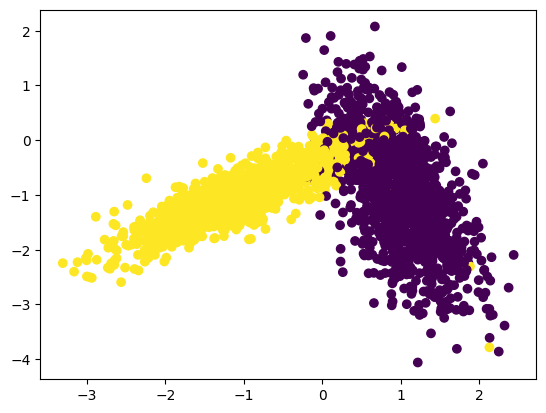

In [9]:

#colors = {0:'orange', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.show()

# Implementing Custom GridSearchCV

In [10]:
# it will take classifier and set of values for hyper prameter in dict type 
# dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors


def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train):
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train)))

def GridSearch(x_train, y_train, classifier, params, folds):
    train_scores = []
    test_scores  = []    
    for k in tqdm(params['n_neighbors']):
        train_scores_folds = []
        test_scores_folds  = []
        for f in range(0, folds):
            # check this out: https://stackoverflow.com/a/9755548/4084039
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(x_train)
            test_indices  = list( set(list(range(1, len(x_train)))) - set(train_indices) )
            #print(train_indices, test_indices)

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = int(k)
            classifier.fit(X_train, Y_train)

            Y_predicted = classifier.predict(X_test)
            test_scores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            train_scores_folds.append(accuracy_score(Y_train, Y_predicted))
        train_scores.append(np.mean(np.array(train_scores_folds)))
        test_scores.append(np.mean(np.array(test_scores_folds)))
    return train_scores,test_scores

  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:06<00:00,  1.68it/s]


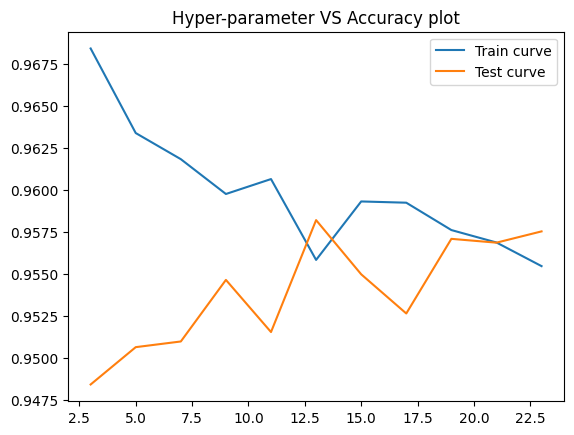

In [14]:

neigh = KNeighborsClassifier()

params = {'n_neighbors' : [3., 5., 7., 9., 11., 13., 15., 17., 19., 21., 23.]}
folds = 3

train_scores, test_scores = GridSearch(X_train, y_train, neigh, params, folds)
 

plt.plot(params['n_neighbors'],train_scores, label='Train curve')
plt.plot(params['n_neighbors'],test_scores, label='Test curve')
plt.title('Hyper-parameter VS Accuracy plot')
plt.legend()
plt.show()

### Plotting decision surface

In [15]:

def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

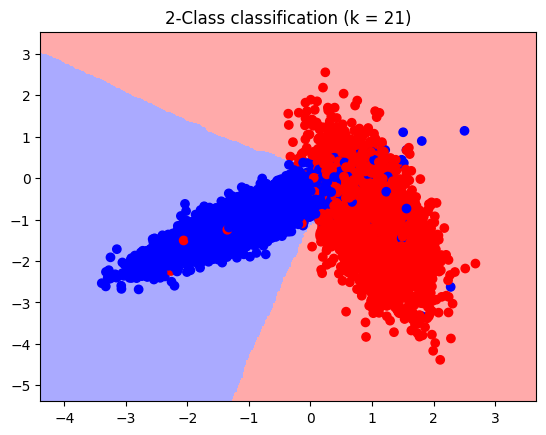

In [16]:
# Plotting decision boundary
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)